In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from qutip import *

In [2]:
res_list = []

for i in range(60):
    res_list.append(qload('itj_{}'.format(i+1)))
    
res_list[0].states[-1]

Loaded Result object:
Result object with sesolve data.
--------------------------------
states = True
num_collapse = 0
Loaded Result object:
Result object with sesolve data.
--------------------------------
states = True
num_collapse = 0
Loaded Result object:
Result object with sesolve data.
--------------------------------
states = True
num_collapse = 0
Loaded Result object:
Result object with sesolve data.
--------------------------------
states = True
num_collapse = 0
Loaded Result object:
Result object with sesolve data.
--------------------------------
states = True
num_collapse = 0
Loaded Result object:
Result object with sesolve data.
--------------------------------
states = True
num_collapse = 0
Loaded Result object:
Result object with sesolve data.
--------------------------------
states = True
num_collapse = 0
Loaded Result object:
Result object with sesolve data.
--------------------------------
states = True
num_collapse = 0
Loaded Result object:
Result object with sesolve

Quantum object: dims = [[2, 2, 2, 2], [1, 1, 1, 1]], shape = (16, 1), type = ket
Qobj data =
[[-0.06437123+0.06817371j]
 [-0.06292115+0.07286002j]
 [-0.18343411+0.17423224j]
 [-0.18436436+0.17568413j]
 [-0.22186472+0.25079838j]
 [-0.06280808+0.07242506j]
 [-0.18202549+0.16940652j]
 [-0.18311804+0.17077295j]
 [-0.22799109+0.25323441j]
 [-0.06464109+0.07235252j]
 [-0.18391065+0.17277911j]
 [-0.18478951+0.17441499j]
 [-0.06156697+0.06948618j]
 [-0.30575914+0.35545562j]
 [-0.18239616+0.1692915j ]
 [-0.18397516+0.17100879j]]

In [3]:
res00_list = []
res01_list = []
res10_list = []
res11_list = []

for i in range(60):
    if i % 2 == 1:
        res00_list.append(expect(ptrace(res_list[i].states[-1], [2,3]), tensor(basis(2,0),basis(2,0))))
        res01_list.append(expect(ptrace(res_list[i].states[-1], [2,3]), tensor(basis(2,0),basis(2,1))))
        res10_list.append(expect(ptrace(res_list[i].states[-1], [2,3]), tensor(basis(2,1),basis(2,0))))
        res11_list.append(expect(ptrace(res_list[i].states[-1], [2,3]), tensor(basis(2,1),basis(2,1))))

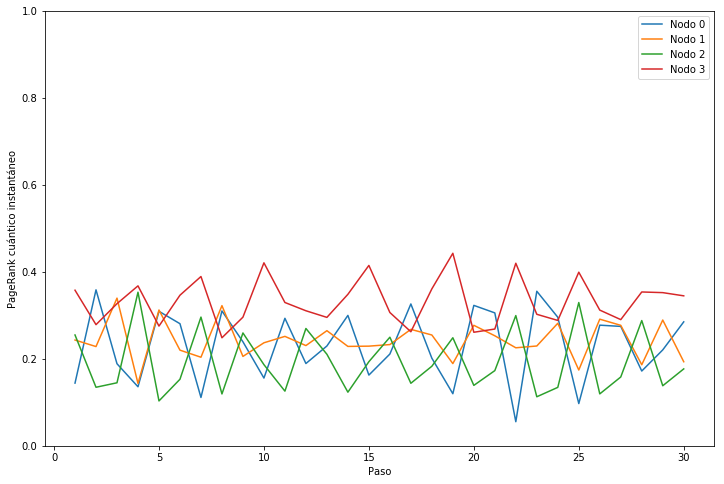

In [4]:
fig, axes = plt.subplots(1, 1, sharex=True, figsize=(12,8))
axes.plot(list(range(1,31)),np.abs(res00_list), label='Nodo 0')
axes.plot(list(range(1,31)),np.abs(res01_list), label='Nodo 1')
axes.plot(list(range(1,31)),np.abs(res10_list), label='Nodo 2')
axes.plot(list(range(1,31)),np.abs(res11_list), label='Nodo 3')
axes.set_xlabel('Paso')
axes.set_ylabel('PageRank cuántico instantáneo')
axes.set_ylim(0,1)
axes.legend()
fig.savefig('../../../img/tree-inst-lossless.eps', format='eps')

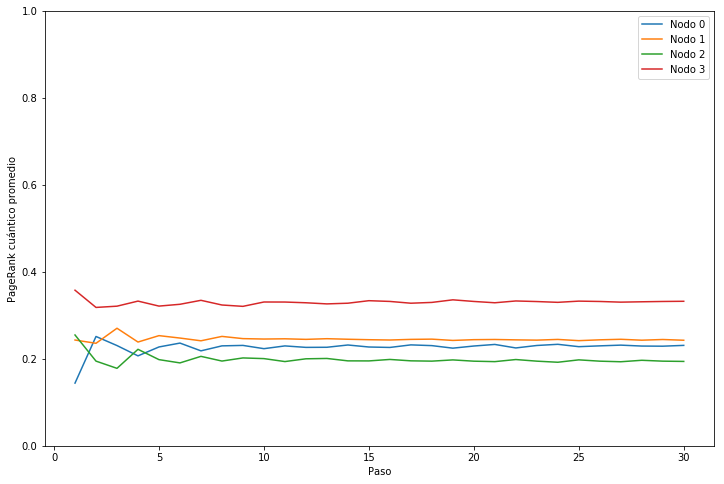

In [5]:
fig, axes = plt.subplots(1, 1, sharex=True, figsize=(12,8))
axes.plot(list(range(1,31)),np.abs([np.mean(res00_list[:i+1]) for i in range(len(res00_list))]), label='Nodo 0')
axes.plot(list(range(1,31)),np.abs([np.mean(res01_list[:i+1]) for i in range(len(res01_list))]), label='Nodo 1')
axes.plot(list(range(1,31)),np.abs([np.mean(res10_list[:i+1]) for i in range(len(res10_list))]), label='Nodo 2')
axes.plot(list(range(1,31)),np.abs([np.mean(res11_list[:i+1]) for i in range(len(res11_list))]), label='Nodo 3')
axes.set_xlabel('Paso')
axes.set_ylabel('PageRank cuántico promedio')
axes.set_ylim(0,1)
axes.legend()
fig.savefig('../../../img/tree-mean-lossless.eps', format='eps')

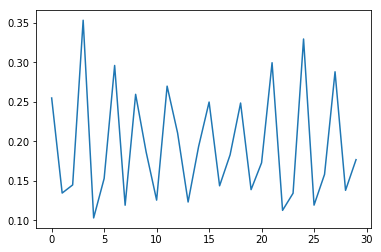

In [6]:
plt.plot(np.abs(res10_list))

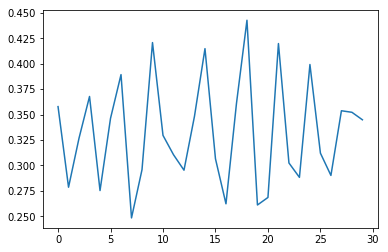

In [7]:
plt.plot(np.abs(res11_list))

In [8]:
[np.mean(res00_list),np.mean(res01_list),np.mean(res10_list),np.mean(res11_list)]

[0.23091492401045827,
 0.24272816259286908,
 0.1940345766609399,
 0.3323223367357327]

In [9]:
np.mean(res00_list)+np.mean(res01_list)+np.mean(res10_list)+np.mean(res11_list)

1.0